<a href="https://colab.research.google.com/github/Shreya-Naveen/Genomics-Proteomics/blob/main/Genomics_Proteomics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FASTA

In [ ]:
!pip install BioPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.9 MB/s eta 0:00:00


In [ ]:
import Bio
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio.Seq import Seq
import Bio.pairwise2
from Bio.pairwise2 import format_alignment

/usr/local/lib/python3.9/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [ ]:
fasta_string = open("/content/lambda_virus (1).fa").read()

In [ ]:
result_handle = NCBIWWW.qblast("blastn", "nt", fasta_string)

In [ ]:
blast_record = NCBIXML.read(result_handle)

In [ ]:
def reverseComplement(s):
  complement = {'A' : 'T', 'T' : 'A', 'G' : 'C', 'C': 'G', 'N' : 'N'}
  t = ''
  for base in s:
    t = complement[base] + t
  return t


In [ ]:
def naive(read,genome):
  p_rev = reverseComplement(read)
  occurences=[]
  for i in range(len(genome)-len(read)+1):
    match= True
    for j in range(len(read)):
      if not genome[i+j]==read[j]:
        match=False
        break
    if not match:
            match = True
            for j in range(len(read)):
                if genome[i + j] != p_rev[j]:
                    match = False
                    break
    if match:
      occurences.append(i)
  return occurences

In [ ]:
print(len(naive('TTAA',fasta_string )))

191


In [ ]:
print(min(naive('AGTCGA',fasta_string ))) #offset

530


In [ ]:
print(max(naive('AGTCGA',fasta_string)))

46091


In [ ]:
def readGenome(filename):
  genome=''
  with open(filename,'r') as f:
    for line in f:
      if not line[0]== '>':
        genome+=line.rstrip()       #rstrip removes trailing whitespaces
  return genome

filename='/content/lambda_virus (1).fa'
genome=readGenome(filename)


In [ ]:
counts={'A':0,'T':0,'G':0,'C':0,'N':0}
for base in genome:
  counts[base]+=1
print(counts)

{'A': 12334, 'T': 11986, 'G': 12820, 'C': 11362, 'N': 0}


BY ANALYSIS IT IS CERTAIN THAT THE GIVEN LAMBDA VIRUS SEQUENCE IS AT RICH.
THIS IMPLIES THAT:

*   The AT-rich DNA is mostly associated with condensed chromatin
*   The AT-rich genes are prone to be tissue-specific (silenced in most tissues) due to the condensing causing to potentially act as heterochromatin
* Infection of the lambda virus in a bacteria: Host DNA gyrase puts negative supercoils in the circular chromosome, causing A-T rich regions to unwind and drive transcription.   








In [ ]:
def my_naive(read, genome):
    occurrences = []
    for i in range(len(genome) - len(read) + 1):
        count_mismatch = 0
        for j in range(len(read)):
            if genome[i+j] != read[j]:
                count_mismatch += 1
        if count_mismatch <= 3:
            occurrences.append(i)
    return occurrences

In [ ]:
print(min(naive('AGTCGA',genome ))) #offset

450


Mismatch has the potential to come up with more accurate and precise matches of the read sequence to the genome. The exact matches can be detected by first filtering out the possible minor mismatches which occur



*   Without using a mismatch, the offset of AGTCGA was detected at the 530 while with the introduction of the mismatch of 3 for every occurence, the same was shifted to the 430th position. My inference of the same is that probably, my introducing mismatches, querying occurs more efficiently to detect the required sequence offset thus giving a better outcome with a better result which could potentially affect the interpretation of genomes of certain organisms









FASTQ

In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open("/content/ERR037900_1.first1000 (1).fastq") as f:
        while True:
            f.readline() #first line is nothign much
            seq = f.readline().rstrip()
            f.readline() # just the + sign
            qual = f.readline().rstrip()
            if len(seq) == 0: #end of file
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq("/content/ERR037900_1.first1000.fastq")

def phred33ToQ(qual):
    return ord(qual) - 33

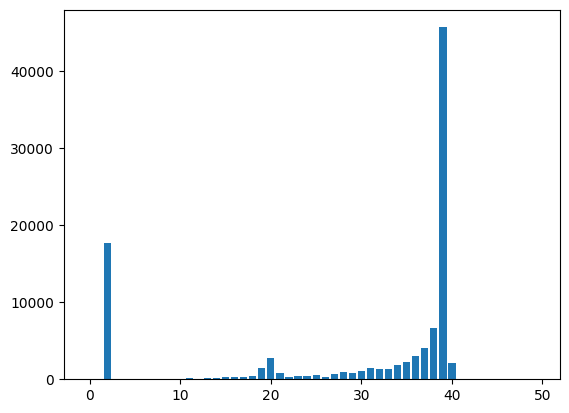

In [ ]:
def createHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

%matplotlib inline
import matplotlib.pyplot as plt
h = createHist(quals)
plt.bar(range(len(h)), h)
plt.show()

Yes, there are poor sequencing reads in the fastq file. we know that lesser the quality score, lower is the chance that the sequence is correct. Thus we can conclud from the graph too that, the lines closer to origin on x axis correspond to lower quality scores which inturn point out that these are the poor sequncing reads in the fastq file

NAIVE EXACT MATCHING

In [ ]:
def readGenome(filename):
  genome = ''
  with open(filename, 'r') as f:
    for line in f:
      if not line[0] == '>':
        genome += line.rstrip() #removes trailing whitespaces
  return genome

filename = '/content/chr1.GRCh38.excerpt.fasta'
genome = readGenome(filename)

In [ ]:
def naive_with_counts(read, genome):

    count_align = 0
    for i in range(len(genome) - len(read) + 1):
        count_align += 1
        match = True
        for j in range(len(read)):

            if genome[i+j] != [j]:
                match = False
                break

    return count_align

In [ ]:
genome_file = '/content/chr1.GRCh38.excerpt.fasta'

genome = readGenome(genome_file)
read = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
num_alignments= naive_with_counts(read, genome)
print(" Number of alignments\n",num_alignments )

 Number of alignments
 799954


BOYRE MOORE ALOGORITHM

In [ ]:
import string

def z_array(s):
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z

In [ ]:
def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]

In [ ]:
def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp

In [ ]:
def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l

In [ ]:
def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp

In [ ]:
def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)

In [ ]:
def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


In [ ]:
def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]

In [ ]:
def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab

In [ ]:
class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """

    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)

    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)

    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]

    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [ ]:
def boyer_moore_with_counts(p, p_bm, t):
    i = 0
    #occurrences = []
    #count_chr = 0
    count_align = 0
    while i < len(t) - len(p) + 1:
        count_align += 1
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            #count_chr += 1
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break

            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return  count_align

In [ ]:
genome_file = '/content/chr1.GRCh38.excerpt.fasta'

t = readGenome(genome_file)
p = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
p_bm = BoyerMoore(p, alphabet='ACGT')
num_alignments= boyer_moore_with_counts(p, p_bm, t)
print(" number of alignments \n",  num_alignments)

 number of alignments 
 61270


1.   Number of alignments with respect to naive pattern matching:799954
2.   Number of alignments with respect to Boyre Moore: 61270
* From the data, we can say that Boyre Moore algorithm is better for the reason that The Boyer Moore algorithm does preprocessing.
* It processes the pattern and creates different arrays for each of the two(bad character and good suffix). At every step, it slides the pattern by the max of the slides suggested by each of the two. So it uses greatest offset suggested by the two at every step.
* Unlike Naive pattern matching, where we slide the pattern over the text one by one, we here skip the sequences which are not there in the read, thus making the process of querying faster
* Also, by considering the minor mismatches which may occur too, Boyre Moore algorithm has a potential of giving a more accurately queried output for the number of alignments







k-MER INDEXING

In [ ]:
import bisect

class SubseqIndex(object):
    """ Holds a subsequence index for a text T """

    def __init__(self, t, k, ival):
        """ Create index from all subsequences consisting of k characters
            spaced ival positions apart.  E.g., SubseqIndex("ATAT", 2, 2)
            extracts ("AA", 0) and ("TT", 1). """
        self.k = k  # num characters per subsequence extracted
        self.ival = ival  # space between them; 1=adjacent, 2=every other, etc
        self.index = []
        self.span = 1 + ival * (k - 1)
        for i in range(len(t) - self.span + 1):  # for each subseq
            self.index.append((t[i:i+self.span:ival], i))  # add (subseq, offset)
        self.index.sort()  # alphabetize by subseq

    def query(self, p):
        """ Return index hits for first subseq of p """
        subseq = p[:self.span:self.ival]  # query with first subseq
        i = bisect.bisect_left(self.index, (subseq, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != subseq:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [ ]:
genome_file = '/content/chr1.GRCh38.excerpt.fasta'

t = readGenome(genome_file)
p = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
ind=SubseqIndex(t,8,3)
print(ind.query(p))


[56922, 67486, 83863, 84641, 84775, 124024, 147558, 191452, 199607, 262042, 262174, 273669, 322735, 364263, 421354, 454332, 465647, 471966, 472634, 489019, 558456, 579737, 596898, 635931, 651523, 657496, 658702, 681737, 707151, 712449, 717706, 719418, 719557, 746620, 747359]


EDIT DISTANCE DYNAMIC PROGRAMMING

In [ ]:
def editDistance(x, y):
  D = []
  for i in range(len(x) + 1):
    D.append([0] * (len(y) + 1))
  for i in range(len(x) + 1):
    D[i][0] = i
  for i in range(len(y) + 1):
    D[0][i] = i
  for i in range(1, len(x) + 1):
    for j in range(1, len(y) + 1):
      distHor = D[i][j-1] + 1
      distVer = D[i-1][j] + 1
      if x[i-1] == y[j-1]:
        distDiag = D[i-1][j-1]
      else:
        distDiag = D[i-1][j-1] + 1
      D[i][j] = min(distHor, distVer, distDiag)
  return D[-1][-1]

In [ ]:
x = 'GATAGCGATTCGCGCGAGTGT'
y = 'TACTGTATATCTGATCTAACGGTC'
print(editDistance(x, y))

14


EDIT DISTANCE AND GLOBAL ALIGNMENT





*  EDIT DISTANCE IS DEFINED AS THE MINIMUM NUMBER OF EDITS TO MAKE ONE STRING, SAY X, CONVERT INTO ANOTHER STRING, SAY Y. THE EDITS CAN BE OF THE FORM OF INSERTIONS, DELETIONS OR SUBSTITUTIONS. HERE THE LIKELIHOOD OF A DELETION, INSERTION OR SUBSTITUTION ARE ALL EQUAL.

eD(αC, βA)=min   {eD(α, β)+1
                 eD(αC, β)+1
                 eD(α, βA)+1}

* GLOBAL ALIGNMENT IS DEFINED AS THE EDIT DISTANCE BUT WITH THE CONSIDERATION OF THE FACT THAT THE EDITS ARE NOT EQUALLY LIKELY TO OCCUR. THUS, A PENALIZATION MATRIX IS CONSTRUCTED AND BASED ON THE PENALTY INCURRED, THE FINAL EDIT DISTANCE IS CALCULATED TAKING INTO CONSIDERATION THE PENALTY TOO.

galign(αx, βy)=min  { galign(α, β)+p(x,y)
                     galign(αC, β)+p(x,-)
                     galign(α, βA)+p(-,y)}




